In [ ]:
# @title Package needed
!pip install xgboost
!pip install scikit-uplift
!pip install imblearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# @title Data Processing
# Load the training and test datasets
training_data = pd.read_csv('https://raw.githubusercontent.com/joshxinjie/Data_Scientist_Nanodegree/master/starbucks_portfolio_exercise/training.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/joshxinjie/Data_Scientist_Nanodegree/master/starbucks_portfolio_exercise/Test.csv')

# Combine the datasets
combined_data = pd.concat([training_data, test_data], ignore_index=True)
combined_data['Promotion'] = combined_data['Promotion'].map({'Yes': 1, 'No': 0})
print(combined_data.head(10))

In [ ]:
# Count unique value of 'purchase'
combined_data["purchase"].value_counts()

In [ ]:
# Convert customers to 4 buyer types
combined_data['buyer_type'] = 0
combined_data.loc[(combined_data.Promotion == 0)&(combined_data.purchase == 1), 'buyer_type'] = 1
combined_data.loc[(combined_data.Promotion == 1)&(combined_data.purchase == 0), 'buyer_type'] = 2
combined_data.loc[(combined_data.Promotion == 0)&(combined_data.purchase == 0), 'buyer_type'] = 3
combined_data['buyer_type'].value_counts()

In [ ]:
# Perform up-sampling to balance the data
features = combined_data.columns.difference(['buyer_type'])
X_train = combined_data[features]
Y_train = combined_data['buyer_type']

# Setting up SMOTE to balance the dataset
sm = SMOTE(sampling_strategy={0: 62612, 1: 62612, 2: 62612, 3: 62612}, random_state=42)

# Apply SMOTE
X_train_upsamp, Y_train_upsamp = sm.fit_resample(X_train, Y_train)

# Convert the upsampled data back into DataFrame and Series
X_train_upsamp = pd.DataFrame(X_train_upsamp, columns=features)
Y_train_upsamp = pd.Series(Y_train_upsamp)
final_upsampled_data = pd.concat([X_train_upsamp, Y_train_upsamp], axis=1)
final_upsampled_data.head(10)

In [ ]:
# check the final data see if it's balanced
final_upsampled_data['Promotion'].value_counts()
final_upsampled_data['purchase'].value_counts()

In [ ]:
# Download the final dataset and put it in Github repo
final_upsampled_data.to_csv('starbuck.csv', index=False)
files.download('starbuck.csv')

In [ ]:
# @title Load Data
data = pd.read_csv("https://raw.githubusercontent.com/STA561-Final-Project/causal-ml/main/starbuck.csv")

# Display the first few rows of the transformed data
data

,ID,Promotion,V1,V2,V3,V4,V5,V6,V7,purchase,buyer_type
0,1,0,2,30.443518,-1.165083,1,1,3,2,0,3
1,3,0,3,32.159350,-0.645617,2,3,2,2,0,3
2,4,0,2,30.431659,0.133583,1,1,4,2,0,3
3,5,0,0,26.588914,-0.212728,2,1,4,2,0,3
4,8,1,3,28.044331,-0.385883,1,1,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
250443,123137,1,2,22.492320,0.795937,2,2,1,1,0,2
250444,50821,1,1,29.660005,1.264919,2,2,1,1,0,2
250445,33347,1,0,28.862809,0.963575,2,3,2,1,0,2
250446,16269,1,1,35.587445,0.592060,1,2,3,1,0,2


In [ ]:
# Filter out the columns 'user', 'cate_id', 'customer'
filtered_data = data.drop(['ID', 'buyer_type'], axis=1)

# Display the first few rows of the filtered data
filtered_data
# This will print distinct values for each column
for column in filtered_data.columns:
    print(f"Distinct values in '{column}': {filtered_data[column].unique()}")

Distinct values in 'Promotion': [0 1]
Distinct values in 'V1': [2 3 0 1]
Distinct values in 'V2': [30.4435178  32.1593501  30.4316591  ... 28.86280921 35.58744477
 35.10751318]
Distinct values in 'V3': [-1.1650834  -0.6456167   0.13358341 ...  0.9635752   0.59206016
  1.51159774]
Distinct values in 'V4': [1 2]
Distinct values in 'V5': [1 3 4 2]
Distinct values in 'V6': [3 2 4 1]
Distinct values in 'V7': [2 1]
Distinct values in 'purchase': [0 1]


In [ ]:
# Columns to encode
columns_to_encode = ['V1', 'V4', 'V5', 'V6', 'V7']

# Apply one-hot encoding
cleaned_data = pd.get_dummies(filtered_data, columns=columns_to_encode, drop_first=False)

# Show new DataFrame structure
print(cleaned_data.head())

   Promotion         V2        V3  purchase   V1_0   V1_1   V1_2   V1_3  \
0          0  30.443518 -1.165083         0  False  False   True  False   
1          0  32.159350 -0.645617         0  False  False  False   True   
2          0  30.431659  0.133583         0  False  False   True  False   
3          0  26.588914 -0.212728         0   True  False  False  False   
4          1  28.044331 -0.385883         0  False  False  False   True   

    V4_1   V4_2   V5_1   V5_2   V5_3   V5_4   V6_1   V6_2   V6_3   V6_4  \
0   True  False   True  False  False  False  False  False   True  False   
1  False   True  False  False   True  False  False   True  False  False   
2   True  False   True  False  False  False  False  False  False   True   
3  False   True   True  False  False  False  False  False  False   True   
4   True  False   True  False  False  False  False   True  False  False   

    V7_1  V7_2  
0  False  True  
1  False  True  
2  False  True  
3  False  True  
4  False  Tru

In [ ]:
cleaned_data

,Promotion,V2,V3,purchase,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,V5_1,V5_2,V5_3,V5_4,V6_1,V6_2,V6_3,V6_4,V7_1,V7_2
0,0,30.443518,-1.165083,0,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,True
1,0,32.159350,-0.645617,0,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True
2,0,30.431659,0.133583,0,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False,True
3,0,26.588914,-0.212728,0,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,True
4,1,28.044331,-0.385883,0,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250443,1,22.492320,0.795937,0,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False
250444,1,29.660005,1.264919,0,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,False
250445,1,28.862809,0.963575,0,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False
250446,1,35.587445,0.592060,0,False,True,False,False,True,False,False,True,False,False,False,False,True,False,True,False


In [ ]:
# Converting all boolean columns to integer (1 for True, 0 for False), except 'price'
for column in cleaned_data.columns:
    if cleaned_data[column].dtype == bool and column != 'price':
        cleaned_data[column] = cleaned_data[column].astype(int)

cleaned_data

,Promotion,V2,V3,purchase,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,V5_1,V5_2,V5_3,V5_4,V6_1,V6_2,V6_3,V6_4,V7_1,V7_2
0,0,30.443518,-1.165083,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
1,0,32.159350,-0.645617,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
2,0,30.431659,0.133583,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1
3,0,26.588914,-0.212728,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
4,1,28.044331,-0.385883,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250443,1,22.492320,0.795937,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
250444,1,29.660005,1.264919,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
250445,1,28.862809,0.963575,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
250446,1,35.587445,0.592060,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
# Calculate the counts
purchase_counts_with_promotion = cleaned_data[cleaned_data['Promotion'] == 1]['purchase'].value_counts()
purchase_counts_without_promotion = cleaned_data[cleaned_data['Promotion'] == 0]['purchase'].value_counts()

# Output the results
print("With promotion:")
print(purchase_counts_with_promotion)

print("\nWithout promotion:")
print(purchase_counts_without_promotion)

With promotion:
purchase
0    62612
1    62612
Name: count, dtype: int64

Without promotion:
purchase
0    62612
1    62612
Name: count, dtype: int64


In [ ]:
# @title Data Splitting
## We would random split all the data into S_training and S_avg

S_train, S_test = train_test_split(cleaned_data, test_size=0.2, random_state=42)

S_train_campaign_x = S_train[S_train['Promotion'] == 1].drop('purchase',axis=1)
S_train_campaign_y = S_train[S_train['Promotion'] == 1]['purchase']

S_test_campaign_x = S_test[S_test['Promotion'] == 1].drop('purchase',axis=1)
S_test_campaign_y = S_test[S_test['Promotion'] == 1]['purchase']

S_train_nocam_x = S_train[S_train['Promotion'] == 0].drop('purchase',axis=1)
S_train_nocam_y = S_train[S_train['Promotion'] == 0]['purchase']

S_test_nocam_x = S_test[S_test['Promotion'] == 0].drop('purchase',axis=1)
S_test_nocam_y = S_test[S_test['Promotion'] == 0]['purchase']


In [ ]:
S_train

,Promotion,V2,V3,purchase,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,V5_1,V5_2,V5_3,V5_4,V6_1,V6_2,V6_3,V6_4,V7_1,V7_2
124794,0,27.195293,-1.078506,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
50595,1,25.778686,0.047006,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
17488,1,26.137898,0.826206,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
26933,0,30.152994,0.133583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
206618,0,32.040431,0.671517,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,34.840657,0.133583,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
103694,1,28.968405,-0.472461,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
131932,1,30.450284,-1.360190,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
146867,1,30.591247,-0.298434,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [ ]:
S_test

,Promotion,V2,V3,purchase,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,V5_1,V5_2,V5_3,V5_4,V6_1,V6_2,V6_3,V6_4,V7_1,V7_2
197377,0,26.369153,-0.230870,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
203948,0,31.616423,1.598552,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1
65189,0,35.782936,0.393317,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
71617,0,24.319409,1.605406,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
13678,0,33.102113,-1.338239,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149733,1,37.476986,0.061571,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
243004,0,32.043784,0.249535,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
235689,0,28.832741,0.482255,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
221809,0,32.244938,-0.107131,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0


# Modeling

In [ ]:
# @title Base Logistic Model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the logistic regression model for customers with compaign
camp_model = logistic_model.fit(S_train_campaign_x, S_train_campaign_y)
predictions = camp_model.predict(S_test_campaign_x)
accuracy = accuracy_score(S_test_campaign_y, predictions)
conf_matrix = confusion_matrix(S_test_campaign_y, predictions)

prob_cam = logistic_model.predict_proba(S_test_campaign_x)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Train the logistic regression model for customers without compaign
logistic_model = LogisticRegression()

# Train the logistic regression model for customers with compaign
nocam_model = logistic_model.fit(S_train_nocam_x, S_train_nocam_y)
predictions_nocam = nocam_model.predict(S_test_nocam_x)
accuracy_nocam = accuracy_score(S_test_nocam_y, predictions_nocam)
conf_matrix_nocam = confusion_matrix(S_test_nocam_y, predictions_nocam)

print(f"Accuracy: {accuracy_nocam}")
print("Confusion Matrix:")
print(conf_matrix_nocam)

S_whole_x = cleaned_data.drop('purchase',axis=1)

# Calculate uplifting scores
prob_cam = camp_model.predict_proba(S_whole_x)
highest_prob_camp_log = np.max(prob_cam, axis=1)

prob_nocam = nocam_model.predict_proba(S_whole_x)
highest_prob_nocamp_log = np.max(prob_nocam, axis=1)


uplift_scores_log = highest_prob_camp_log - highest_prob_nocamp_log
print(uplift_scores_log)

Accuracy: 0.6863829956613462
Confusion Matrix:
[[7977 4632]
 [3247 9267]]
Accuracy: 0.7153442544158289
Confusion Matrix:
[[8061 4232]
 [2875 9799]]
[-0.05972508 -0.07800484  0.01961386 ...  0.09444583 -0.25173221
 -0.08953818]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XGBoost T learner

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize the Grid Search model
grid_search = GridSearchCV(xgb_clf, param_grid, scoring='roc_auc', cv=3, verbose=2)
grid_search_nocam = GridSearchCV(xgb_clf, param_grid, scoring='roc_auc', cv=3, verbose=2)

# Fit the grid search to the data
grid_search.fit(S_train_campaign_x, S_train_campaign_y)
grid_search_nocam.fit(S_train_nocam_x, S_train_nocam_y)

# Get the best parameters
best_parameters = grid_search.best_params_
best_parameters_nocam = grid_search_nocam.best_params_
print("Best Parameters:", best_parameters)
print("Best Parameters:", best_parameters_nocam)

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


best_parameters_cam = {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
best_parameters_nocam = {'colsample_bytree': 0.6, 'gamma': 1.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}


# Initialize the XGBoost models
camp_model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
nocam_model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model for customers with campaign
camp_model_xgb.fit(S_train_campaign_x, S_train_campaign_y)
predictions_camp = camp_model_xgb.predict(S_test_campaign_x)
accuracy_camp = accuracy_score(S_test_campaign_y, predictions_camp)
conf_matrix_camp = confusion_matrix(S_test_campaign_y, predictions_camp)

print(f"Accuracy with campaign: {accuracy_camp}")
print("Confusion Matrix with campaign:")
print(conf_matrix_camp)

# Train the XGBoost model for customers without campaign
nocam_model_xgb.fit(S_train_nocam_x, S_train_nocam_y)
predictions_nocam = nocam_model_xgb.predict(S_test_nocam_x)
accuracy_nocam = accuracy_score(S_test_nocam_y, predictions_nocam)
conf_matrix_nocam = confusion_matrix(S_test_nocam_y, predictions_nocam)

print(f"Accuracy without campaign: {accuracy_nocam}")
print("Confusion Matrix without campaign:")
print(conf_matrix_nocam)

# Calculate uplifting scores using the trained models on a common dataset for predictions
prob_camp_xgb = camp_model_xgb.predict_proba(S_whole_x)
# Select the highest probability between the two predicted classes for each sample
highest_prob_camp = np.max(prob_camp_xgb, axis=1)

prob_nocam_xgb = nocam_model_xgb.predict_proba(S_whole_x)  # Only take the probability of positive class
highest_prob_nocam = np.max(prob_nocam_xgb, axis=1)

# Calculate uplift scores
uplift_scores_xgb = highest_prob_camp - highest_prob_nocam
print("Uplift Scores (XGBoost):")
print(uplift_scores_xgb)

Accuracy with campaign: 0.9004497870477252
Confusion Matrix with campaign:
[[12106   503]
 [ 1998 10516]]
Accuracy without campaign: 0.9145271758721513
Confusion Matrix without campaign:
[[11790   503]
 [ 1631 11043]]
Uplift Scores (XGBoost):
[ 0.12810302 -0.04620218 -0.07439268 ... -0.00447685 -0.05344957
 -0.10948408]


# Random Forest T Learner

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize Random Forest classifiers for treatment and control groups
rf_treatment = RandomForestClassifier(n_estimators=100, random_state=42)
rf_control = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifiers on respective group data
rf_treatment.fit(S_train_campaign_x, S_train_campaign_y)  # Treatment group training data
rf_control.fit(S_train_nocam_x, S_train_nocam_y)          # Control group training data

# Predict probabilities on a common dataset (S_whole_x) for both models
prob_treatment = rf_treatment.predict_proba(S_whole_x)[:, 1]  # Probabilities for the positive class
prob_control = rf_control.predict_proba(S_whole_x)[:, 1]      # Probabilities for the positive class

# Calculate uplift scores by subtracting control probabilities from treatment probabilities
uplift_scores_rf = prob_treatment - prob_control

# Print results
print(f"Accuracy of Random Forest: {accuracy_rf}")
print("Uplift Scores (Random Forest):")
print(uplift_scores_rf)

Accuracy of Random Forest: 0.850017911873582
Uplift Scores (Random Forest):
[ 0.18  0.    0.47 ...  0.   -0.51  0.03]


# Neural Network

In [ ]:
# Library
!pip install keras-tuner
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve, roc_auc_score
from keras_tuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

## Campaign NN model

Epoch 1/200
196/196 [==============================] - 1s 4ms/step - loss: 0.6050 - binary_accuracy: 0.6665 - val_loss: 0.5730 - val_binary_accuracy: 0.6969
Epoch 2/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5686 - binary_accuracy: 0.6980 - val_loss: 0.5705 - val_binary_accuracy: 0.7004
Epoch 3/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5633 - binary_accuracy: 0.7041 - val_loss: 0.5622 - val_binary_accuracy: 0.7062
Epoch 4/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5622 - binary_accuracy: 0.7041 - val_loss: 0.5605 - val_binary_accuracy: 0.7050
Epoch 5/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5602 - binary_accuracy: 0.7077 - val_loss: 0.5598 - val_binary_accuracy: 0.7080
Epoch 6/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5582 - binary_accuracy: 0.7073 - val_loss: 0.5575 - val_binary_accuracy: 0.7097
Epoch 7/200
196/196 [==============================] - 1s 

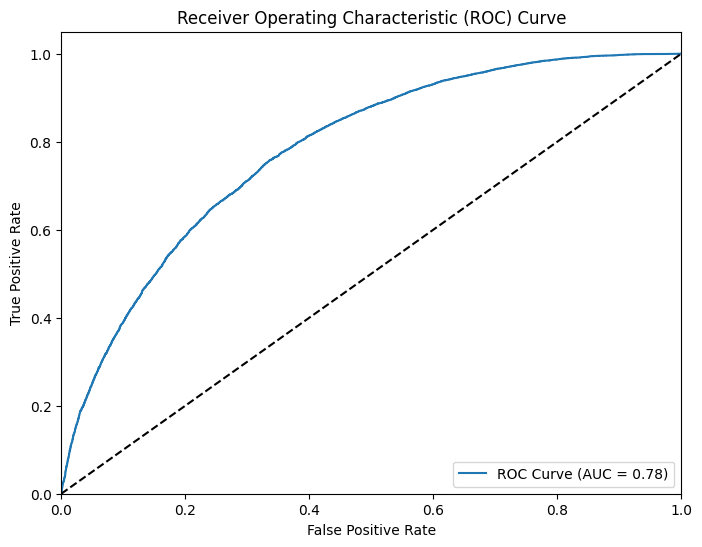

In [ ]:
# NN with Campaign

features_num = ['V2', 'V3']
features_cat = ['V1_0', 'V1_1', 'V1_2', 'V1_3',
       'V4_1', 'V4_2', 'V5_1', 'V5_2', 'V5_3', 'V5_4', 'V6_1', 'V6_2', 'V6_3',
       'V6_4', 'V7_1', 'V7_2']


X_train = S_train_campaign_x.drop(columns=['Promotion'])
X_valid = S_test_campaign_x.drop(columns=['Promotion'])
y_train = S_train_campaign_y
y_valid = S_test_campaign_y


input_shape = (X_train.shape[1],)  # Creating a tuple with a single element

# Building the deep learning model
model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape= input_shape),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

# Compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

# This will run the model and plot the learning curve
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],

)

y_pred = model.predict(X_valid)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Campaign NN model - Tuning

In [ ]:
input_shape = (X_train.shape[1])  # Creating a tuple with a single element

# Define a function that builds your Keras model with hyperparameters
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='binary_accuracy',
    max_trials=5,  # Number of different hyperparameter combinations to try
    directory='my_dir_cam',  # Directory where logs and results will be stored
    project_name='my_project_cam'  # Name for the tuning project
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model.summary()

Reloading Tuner from my_dir_cam/my_project_cam/tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 480)               9120      
                                                                 
 dense_1 (Dense)             (None, 1)                 481       
                                                                 
Total params: 9601 (37.50 KB)
Trainable params: 9601 (37.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200


196/196 [==============================] - 1s 4ms/step - loss: 0.6037 - binary_accuracy: 0.6656 - val_loss: 0.5707 - val_binary_accuracy: 0.6968
Epoch 2/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5668 - binary_accuracy: 0.6987 - val_loss: 0.5623 - val_binary_accuracy: 0.7055
Epoch 3/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5624 - binary_accuracy: 0.7042 - val_loss: 0.5657 - val_binary_accuracy: 0.7024
Epoch 4/200
196/196 [==============================] - 1s 4ms/step - loss: 0.5622 - binary_accuracy: 0.7052 - val_loss: 0.5593 - val_binary_accuracy: 0.7058
Epoch 5/200
196/196 [==============================] - 1s 4ms/step - loss: 0.5596 - binary_accuracy: 0.7066 - val_loss: 0.5572 - val_binary_accuracy: 0.7088
Epoch 6/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5598 - binary_accuracy: 0.7063 - val_loss: 0.5568 - val_binary_accuracy: 0.7096
Epoch 7/200
196/196 [==============================] - 1s 3ms/step - l

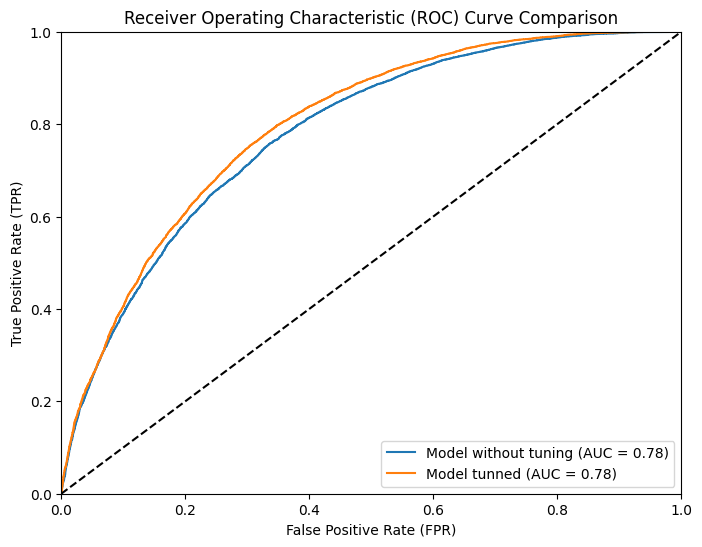

In [ ]:
# Build the best model using the best hyperparameters
best_model = build_model(best_hyperparameters)

# Train the best model with your training data
history_tuned = best_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

y_pred_tuned = best_model.predict(X_valid)

# Calculate the ROC curve
fpr2, tpr2, thresholds = roc_curve(y_valid, y_pred_tuned)

# Calculate the ROC AUC score
roc_auc_tuned = roc_auc_score(y_valid, y_pred)

print("ROC AUC Score:", roc_auc_tuned)

# Print both models to see if it has really improved
# Create a plot to compare the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Model without tuning (AUC = {roc_auc:.2f})')
plt.plot(fpr2, tpr2, label=f'Model tunned (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()


## Get NN_campaign result

In [ ]:
# We will use
S_train_whole1 = cleaned_data.drop(columns=['purchase','Promotion'])
y_pred = best_model.predict(S_train_whole1)

# Flatten y_pred to make it 1-dimensional
y_pred = y_pred.flatten()
y_pred

7827/7827 [==============================] - 10s 1ms/step


array([0.39779598, 0.21099567, 0.10400918, ..., 0.6966119 , 0.77933466,
       0.18565813], dtype=float32)

In [ ]:
S_train_whole_final = cleaned_data.copy()
S_train_whole_final['NN_camp'] = y_pred
S_train_whole_final

,Promotion,V2,V3,purchase,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,...,V5_2,V5_3,V5_4,V6_1,V6_2,V6_3,V6_4,V7_1,V7_2,NN_camp
0,0,30.443518,-1.165083,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0.397796
1,0,32.159350,-0.645617,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0.210996
2,0,30.431659,0.133583,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0.104009
3,0,26.588914,-0.212728,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0.415342
4,1,28.044331,-0.385883,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0.071641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250443,1,22.492320,0.795937,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0.517117
250444,1,29.660005,1.264919,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0.670246
250445,1,28.862809,0.963575,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0.696612
250446,1,35.587445,0.592060,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0.779335


## NoCampaign NN model

Input shape: [18]
Epoch 1/200
196/196 [==============================] - 1s 4ms/step - loss: 0.5957 - binary_accuracy: 0.6778 - val_loss: 0.5531 - val_binary_accuracy: 0.7170
Epoch 2/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5464 - binary_accuracy: 0.7164 - val_loss: 0.5432 - val_binary_accuracy: 0.7195
Epoch 3/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5414 - binary_accuracy: 0.7204 - val_loss: 0.5402 - val_binary_accuracy: 0.7225
Epoch 4/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5375 - binary_accuracy: 0.7226 - val_loss: 0.5387 - val_binary_accuracy: 0.7239
Epoch 5/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5355 - binary_accuracy: 0.7231 - val_loss: 0.5374 - val_binary_accuracy: 0.7214
Epoch 6/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5355 - binary_accuracy: 0.7244 - val_loss: 0.5379 - val_binary_accuracy: 0.7244
Epoch 7/200
196/196 [===================

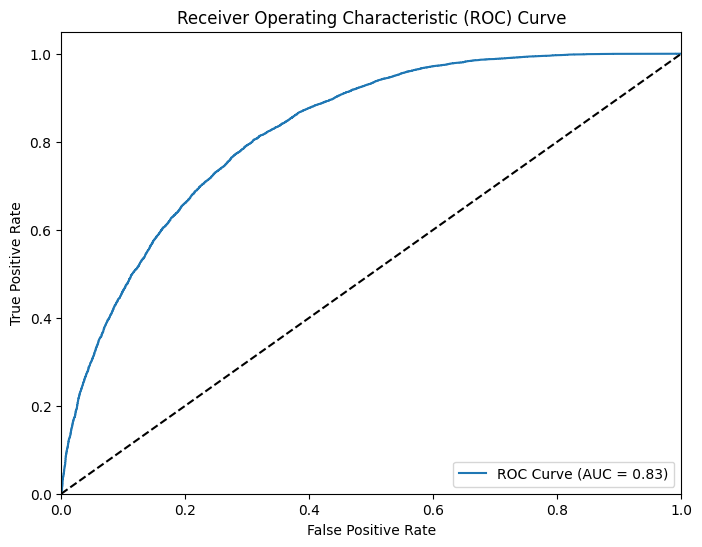

In [ ]:
# NN with no_Campaign

features_num = ['V2', 'V3']
features_cat = ['V1_0', 'V1_1', 'V1_2', 'V1_3',
       'V4_1', 'V4_2', 'V5_1', 'V5_2', 'V5_3', 'V5_4', 'V6_1', 'V6_2', 'V6_3',
       'V6_4', 'V7_1', 'V7_2']


X_train1 = S_train_nocam_x.drop(columns=['Promotion'])
X_valid1 = S_test_nocam_x.drop(columns=['Promotion'])
y_train1 = S_train_nocam_y
y_valid1 = S_test_nocam_y

input_shape1 = [X_train1.shape[1]]
print("Input shape: {}".format(input_shape1))


# Building the deep learning model
model1 = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape= input_shape1),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

# Compiling the model
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

# This will run the model and plot the learning curve
early_stopping1 = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history1 = model1.fit(
    X_train1, y_train1,
    validation_data=(X_valid1, y_valid1),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping1],
)

y_pred1 = model1.predict(X_valid1)

# Calculate the ROC curve
fpr1, tpr1, thresholds1 = roc_curve(y_valid1, y_pred1)

# Calculate the ROC AUC score
roc_auc1 = roc_auc_score(y_valid1, y_pred1)

print("ROC AUC Score:", roc_auc1)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'ROC Curve (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## NoCampaign NN model - Tuning

In [ ]:
# Tuning - NN with noCampaign
input_shape = (X_train1.shape[1])  # Creating a tuple with a single element

# Define a function that builds your Keras model with hyperparameters
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model

tuner1 = RandomSearch(
    build_model,
    objective='binary_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    directory='my_dir_nocam',  # Directory where logs and results will be stored
    project_name='my_project_nocam'  # Name for the tuning project
)

tuner1.search(X_train1, y_train1, epochs=10, validation_data=(X_valid1, y_valid1))

#best_model1 = tuner1.get_best_models(num_models=1)[0]
best_hyperparameters1 = tuner1.get_best_hyperparameters(num_trials=1)[0]
#best_model1.summary()


Reloading Tuner from my_dir_nocam/my_project_nocam/tuner0.json


Epoch 1/200
196/196 [==============================] - 1s 4ms/step - loss: 0.5869 - binary_accuracy: 0.6861 - val_loss: 0.5493 - val_binary_accuracy: 0.7176
Epoch 2/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5437 - binary_accuracy: 0.7198 - val_loss: 0.5407 - val_binary_accuracy: 0.7228
Epoch 3/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5376 - binary_accuracy: 0.7236 - val_loss: 0.5379 - val_binary_accuracy: 0.7205
Epoch 4/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5352 - binary_accuracy: 0.7246 - val_loss: 0.5353 - val_binary_accuracy: 0.7255
Epoch 5/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5331 - binary_accuracy: 0.7257 - val_loss: 0.5337 - val_binary_accuracy: 0.7254
Epoch 6/200
196/196 [==============================] - 1s 3ms/step - loss: 0.5332 - binary_accuracy: 0.7258 - val_loss: 0.5322 - val_binary_accuracy: 0.7259
Epoch 7/200
196/196 [==============================] - 1s 

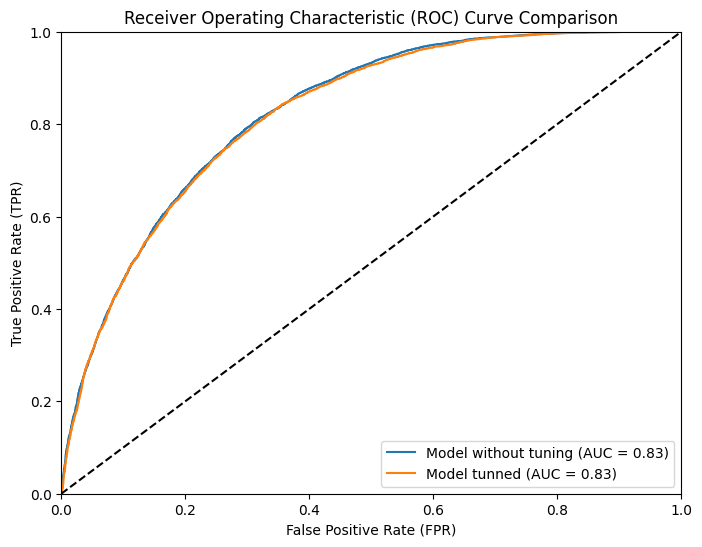

In [ ]:
# Build the best model using the best hyperparameters
best_model1 = build_model(best_hyperparameters1)

# Train the best model with your training data
history_tuned1 = best_model1.fit(
    X_train1, y_train1,
    validation_data=(X_valid1, y_valid1),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping1],
)

y_pred_tuned1 = best_model1.predict(X_valid1)

history_df_tuned1 = pd.DataFrame(history_tuned1.history)

# Calculate the ROC curve
fpr11, tpr11, thresholds11 = roc_curve(y_valid1, y_pred_tuned1)

# Calculate the ROC AUC score
roc_auc_tuned11 = roc_auc_score(y_valid1, y_pred1)

print("ROC AUC Score:", roc_auc_tuned11)

# Print both models to see if it has really improved
# Create a plot to compare the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f'Model without tuning (AUC = {roc_auc1:.2f})')
plt.plot(fpr11, tpr11, label=f'Model tunned (AUC = {roc_auc_tuned11:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.show()


## Get NN_nocampaign result

In [ ]:
# There is no improvement, so we just use original model.
S_train_whole1 = cleaned_data.drop(columns=['purchase','Promotion']).copy()
y_pred1 = best_model1.predict(S_train_whole1)

# Flatten y_pred to make it 1-dimensional
y_pred1 = y_pred1.flatten()

S_train_whole_final['NN_nocamp'] = y_pred1
S_train_whole_final

7827/7827 [==============================] - 9s 1ms/step


,Promotion,V2,V3,purchase,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,...,V6_4,V7_1,V7_2,NN_camp,NN_nocamp,Uplift_Score,Uplift_Score_xgb,Uplift_Score_all,Uplift_Score_rf,Uplift_Score_log
0,0,30.443518,-1.165083,0,0,0,1,0,1,0,...,0,0,1,0.397796,0.403136,-0.005340,0.128103,-0.059725,0.18,-0.059725
1,0,32.159350,-0.645617,0,0,0,0,1,0,1,...,0,0,1,0.210996,0.091249,0.119747,-0.046202,-0.078005,0.00,-0.078005
2,0,30.431659,0.133583,0,0,0,1,0,1,0,...,1,0,1,0.104009,0.296777,-0.192768,-0.074393,0.019614,0.47,0.019614
3,0,26.588914,-0.212728,0,1,0,0,0,0,1,...,1,0,1,0.415342,0.085881,0.329461,-0.078622,-0.159528,0.63,-0.159528
4,1,28.044331,-0.385883,0,0,0,0,1,1,0,...,0,0,1,0.071641,0.320202,-0.248561,0.109687,0.126038,-0.02,0.126038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250443,1,22.492320,0.795937,0,0,0,1,0,0,1,...,0,1,0,0.517117,0.543745,-0.026628,-0.033232,0.053770,-0.02,0.053770
250444,1,29.660005,1.264919,0,0,1,0,0,0,1,...,0,1,0,0.670246,0.719154,-0.048908,0.223293,-0.052968,0.11,-0.052968
250445,1,28.862809,0.963575,0,1,0,0,0,0,1,...,0,1,0,0.696612,0.595317,0.101295,-0.004477,0.094446,0.00,0.094446
250446,1,35.587445,0.592060,0,0,1,0,0,1,0,...,0,1,0,0.779335,0.894112,-0.114777,-0.053450,-0.251732,-0.51,-0.251732


In [ ]:
# Uplifting Score

S_train_whole_final['Uplift_Score'] = S_train_whole_final['NN_camp'] - S_train_whole_final['NN_nocamp']

# Assuming S_train_whole_final is already defined and has a column 'Uplift_Score'
#S_train_whole_final['persuasive'] = S_train_whole_final['Uplift_Score'].apply(lambda x: 1 if x > 0 else 0)
S_train_whole_final

,Promotion,V2,V3,purchase,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,...,V6_4,V7_1,V7_2,NN_camp,NN_nocamp,Uplift_Score,Uplift_Score_xgb,Uplift_Score_all,Uplift_Score_rf,Uplift_Score_log
0,0,30.443518,-1.165083,0,0,0,1,0,1,0,...,0,0,1,0.397796,0.403136,-0.005340,0.128103,-0.059725,0.18,-0.059725
1,0,32.159350,-0.645617,0,0,0,0,1,0,1,...,0,0,1,0.210996,0.091249,0.119747,-0.046202,-0.078005,0.00,-0.078005
2,0,30.431659,0.133583,0,0,0,1,0,1,0,...,1,0,1,0.104009,0.296777,-0.192768,-0.074393,0.019614,0.47,0.019614
3,0,26.588914,-0.212728,0,1,0,0,0,0,1,...,1,0,1,0.415342,0.085881,0.329461,-0.078622,-0.159528,0.63,-0.159528
4,1,28.044331,-0.385883,0,0,0,0,1,1,0,...,0,0,1,0.071641,0.320202,-0.248561,0.109687,0.126038,-0.02,0.126038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250443,1,22.492320,0.795937,0,0,0,1,0,0,1,...,0,1,0,0.517117,0.543745,-0.026628,-0.033232,0.053770,-0.02,0.053770
250444,1,29.660005,1.264919,0,0,1,0,0,0,1,...,0,1,0,0.670246,0.719154,-0.048908,0.223293,-0.052968,0.11,-0.052968
250445,1,28.862809,0.963575,0,1,0,0,0,0,1,...,0,1,0,0.696612,0.595317,0.101295,-0.004477,0.094446,0.00,0.094446
250446,1,35.587445,0.592060,0,0,1,0,0,1,0,...,0,1,0,0.779335,0.894112,-0.114777,-0.053450,-0.251732,-0.51,-0.251732


In [ ]:
S_train_whole_final['Uplift_Score_log']= uplift_scores_log
S_train_whole_final['Uplift_Score_xgb']= uplift_scores_xgb
S_train_whole_final['Uplift_Score_rf']= uplift_scores_rf

In [ ]:
S_train_whole_final

,Promotion,V2,V3,purchase,V1_0,V1_1,V1_2,V1_3,V4_1,V4_2,...,V7_1,V7_2,NN_camp,NN_nocamp,Uplift_Score,Uplift_Score_xgb,Uplift_Score_all,Uplift_Score_rf,Uplift_Score_log,Final_Uplift_Score
0,0,30.443518,-1.165083,0,0,0,1,0,1,0,...,0,1,0.397796,0.403136,-0.005340,0.128103,-0.059725,0.18,-0.059725,0.060759
1,0,32.159350,-0.645617,0,0,0,0,1,0,1,...,0,1,0.210996,0.091249,0.119747,-0.046202,-0.078005,0.00,-0.078005,-0.001115
2,0,30.431659,0.133583,0,0,0,1,0,1,0,...,0,1,0.104009,0.296777,-0.192768,-0.074393,0.019614,0.47,0.019614,0.055613
3,0,26.588914,-0.212728,0,1,0,0,0,0,1,...,0,1,0.415342,0.085881,0.329461,-0.078622,-0.159528,0.63,-0.159528,0.180325
4,1,28.044331,-0.385883,0,0,0,0,1,1,0,...,0,1,0.071641,0.320202,-0.248561,0.109687,0.126038,-0.02,0.126038,-0.008208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250443,1,22.492320,0.795937,0,0,0,1,0,0,1,...,1,0,0.517117,0.543745,-0.026628,-0.033232,0.053770,-0.02,0.053770,-0.006522
250444,1,29.660005,1.264919,0,0,1,0,0,0,1,...,1,0,0.670246,0.719154,-0.048908,0.223293,-0.052968,0.11,-0.052968,0.057854
250445,1,28.862809,0.963575,0,1,0,0,0,0,1,...,1,0,0.696612,0.595317,0.101295,-0.004477,0.094446,0.00,0.094446,0.047816
250446,1,35.587445,0.592060,0,0,1,0,0,1,0,...,1,0,0.779335,0.894112,-0.114777,-0.053450,-0.251732,-0.51,-0.251732,-0.232490


In [ ]:
from sklift.metrics import qini_auc_score
# Calculating the Qini coefficient using scikit-uplift
qini_score_log = qini_auc_score(S_train_whole_final['purchase'], S_train_whole_final['Uplift_Score_log'], S_train_whole_final['purchase'])
qini_score_xgb = qini_auc_score(S_train_whole_final['purchase'], S_train_whole_final['Uplift_Score_xgb'], S_train_whole_final['purchase'])
qini_score_rf = qini_auc_score(S_train_whole_final['purchase'], S_train_whole_final['Uplift_Score_rf'], S_train_whole_final['purchase'])
qini_score_nn = qini_auc_score(S_train_whole_final['purchase'], S_train_whole_final['Uplift_Score'], S_train_whole_final['purchase'])


print("Qini AUC Score for Logistic Regression:", qini_score_log)
print("Qini AUC Score for XGBoost:", qini_score_xgb)
print("Qini AUC Score for Random Forest:", qini_score_rf)
print("Qini AUC Score for Neural Network:", qini_score_nn)

Qini AUC Score for Logistic Regression: 0.05323654823053096
Qini AUC Score for XGBoost: 0.06702339557643668
Qini AUC Score for Random Forest: -0.028638173015179565
Qini AUC Score for Neural Network: -0.048151272046538726


In [ ]:
def calculate_IRR(df, response_column, score_column):
    # Define thresholds or decide on a method to segment the customers based on uplift score
    # For simplicity, let's consider the top decile as the treatment group
    threshold = df[score_column].quantile(0.9)
    treated = df[df[score_column] >= threshold]
    control = df[df[score_column] < threshold]

    # Calculate response rates
    response_rate_treated = treated[response_column].mean()
    response_rate_control = control[response_column].mean()

    # Calculate IRR
    irr = response_rate_treated - response_rate_control
    return irr

irr_log = calculate_IRR(S_train_whole_final, 'purchase', 'Uplift_Score_log')
irr_xgb = calculate_IRR(S_train_whole_final, 'purchase', 'Uplift_Score_xgb')
irr_rf = calculate_IRR(S_train_whole_final, 'purchase', 'Uplift_Score_rf')
irr_nn = calculate_IRR(S_train_whole_final, 'purchase', 'Uplift_Score')


print(f"IRR for Logistic Regression: {irr_log:.4f}")
print(f"IRR for XGBoost: {irr_xgb:.4f}")
print(f"IRR for Random Forest: {irr_rf:.4f}")
print(f"IRR for NN: {irr_nn:.4f}")

IRR for Logistic Regression: 0.1108
IRR for XGBoost: -0.0196
IRR for Random Forest: 0.4588
IRR for NN: -0.0049


In [ ]:
import numpy as np
from scipy.optimize import minimize
from sklift.metrics import qini_auc_score

# Assuming you have functions to calculate IRR and uplift scores already defined
def calculate_combined_IRR(weights):
    final_uplift_score = weights[0] * S_train_whole_final['Uplift_Score_log'] + \
                         weights[1] * S_train_whole_final['Uplift_Score_xgb'] + \
                         weights[2] * S_train_whole_final['Uplift_Score_rf'] + \
                         weights[3] * S_train_whole_final['Uplift_Score']
    S_train_whole_final['Final_Uplift_Score'] = final_uplift_score
    irr = calculate_IRR(S_train_whole_final, 'purchase', 'Final_Uplift_Score')
    qini = qini_auc_score(S_train_whole_final['purchase'], S_train_whole_final['Final_Uplift_Score'], S_train_whole_final['purchase'])
    # Define how you want to combine IRR and Qini score, e.g., average them
    return -(irr + qini)  # negative sign because we want to maximize

# Constraint: sum of weights = 1
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Bounds for each weight to be between 0 and 1
bounds = [(0, 1)] * 4

# Initial guess for weights
initial_weights = [0.25, 0.25, 0.25, 0.25]

# Perform the minimization
result = minimize(calculate_combined_IRR, initial_weights, method='SLSQP', bounds=bounds, constraints=cons)

# The optimal weights
print("Optimal weights:", result.x)


Optimal weights: [0.25001355 0.24999748 0.24999235 0.24999662]


In [ ]:
# Let's say these are your optimal weights obtained from the optimization procedure
optimal_weights = [0.2500042, 0.2499993, 0.24999774, 0.24999903]

# Calculate the final uplift score using the optimized weights
S_train_whole_final['Final_Uplift_Score'] = (
    optimal_weights[0] * S_train_whole_final['Uplift_Score_log'] +
    optimal_weights[1] * S_train_whole_final['Uplift_Score_xgb'] +
    optimal_weights[2] * S_train_whole_final['Uplift_Score_rf'] +
    optimal_weights[3] * S_train_whole_final['Uplift_Score']  # Assuming this is the neural network uplift score
)

final_irr = calculate_IRR(S_train_whole_final, 'purchase', 'Final_Uplift_Score')

# Calculate the final Qini index
final_qini = qini_auc_score(
    S_train_whole_final['purchase'],
    S_train_whole_final['Final_Uplift_Score'],
    S_train_whole_final['Promotion'])

# Print out the final IRR and Qini index
print(f"Final IRR: {final_irr}")
print(f"Final Qini Index: {final_qini}")



Final IRR: 0.4250796788740919
Final Qini Index: 0.584268131050114


# Meta-Learners

## Base Learner

Listed above

## T-Learner

### Stage 1
Estimate the average outcomes $\mu_0(x)$ and $\mu_1(x)$:
$$
\begin{aligned}
& \mu_0(x)=\mathbb{E}[Y(0) \mid X=x] \\
& \mu_1(x)=\mathbb{E}[Y(1) \mid X=x]
\end{aligned}
$$
using machine learning models.


### Stage 2
Define the CATE estimate as:
$$
\hat{\tau}(x)=\hat{\mu}_1(x)-\hat{\mu}_0(x)
$$

In [ ]:
import pandas as pd
from sklearn.base import clone, BaseEstimator

class TLearner(BaseEstimator):
    def __init__(self, model):
        """
        Initialize the T-Learner with a given model.

        Parameters:
        - model: A machine learning model instance from sklearn.
        """
        self.model = model
        self.model_0 = clone(model)
        self.model_1 = clone(model)
        self.is_fitted = False

    def fit(self, data, y, D, X):
        """
        Train the T-Learner models using the provided data.

        Parameters:
        - data: DataFrame containing the training data.
        - y: Name of the customer response column.
        - D: Name of the treatment indicator column.
        - X: List of feature column names.
        """
        # Split the data into treatment and control groups
        control_data = data[data[D] == 0]
        treatment_data = data[data[D] == 1]

        # Train the model on the control group
        self.model_0.fit(control_data[X], control_data[y])

        # Train the model on the treatment group
        self.model_1.fit(treatment_data[X], treatment_data[y])

        self.is_fitted = True
        return self

    def predict(self, data, X):
        """
        Predict the treatment effects using the trained models on new data.

        Parameters:
        - data: DataFrame containing the test data.
        - X: List of feature column names.

        Returns:
        - A DataFrame with the predicted treatment effects.
        """
        if not self.is_fitted:
            raise ValueError("This TLearner instance is not fitted yet. Call 'fit' with appropriate data.")

        # Predict outcomes using the control and treatment models
        data['mu_0_hat'] = self.model_0.predict(data[X])
        data['mu_1_hat'] = self.model_1.predict(data[X])

        # Calculate the treatment effect
        data['estimated_treatment_effect'] = data['mu_1_hat'] - data['mu_0_hat']

        return data[['mu_0_hat', 'mu_1_hat', 'estimated_treatment_effect']]

# Example usage:
# Assume 'model' is an instance of an sklearn regressor, such as sklearn.linear_model.LinearRegression()
# 'data' is a DataFrame with the necessary columns, and 'test_data' is your test DataFrame

#from sklearn.linear_model import LinearRegression
#t_learner = TLearner(LinearRegression())
#t_learner.fit(data=data, y='outcome', D='treatment', X=['feature1', 'feature2', 'feature3'])
#predictions = t_learner.predict(test_data, X=['feature1', 'feature2', 'feature3'])

## X-Learner

### Step 1:
Estimate $\mu_0(s)$ and $\mu_1(s)$ separately with any regression algorithms or supervised machine learning methods (same as T-learner);

### Step 2:
Obtain the imputed treatment effects for individuals
$$
\tilde{\Delta}_i^1:=R_i^1-\hat{\mu}_0\left(S_i^1\right), \quad \tilde{\Delta}_i^0:=\hat{\mu}_1\left(S_i^0\right)-R_i^0 .
$$

### Step 3:
Fit the imputed treatment effects to obtain $\hat{\tau}_1(s):=\mathbb{E}\left[\tilde{\Delta}_i^1 \mid S=s\right]$ and $\hat{\tau}_0(s):=\mathbb{E}\left[\tilde{\Delta}_i^0 \mid S=s\right]$;
### Step 4: The final HTE estimator is given by
$$
\hat{\tau}_{\text {X-learner }}(s)=g(s) \hat{\tau}_0(s)+(1-g(s)) \hat{\tau}_1(s),
$$
where $g(s)$ is a weight function between $[0,1]$. A possible way is to use the propensity score model as an estimate of $g(s)$.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, clone
from sklearn.linear_model import LogisticRegressionCV

class XLearner(BaseEstimator):
    def __init__(self, model):
        """
        Initialize the X-Learner with a given base model.

        Parameters:
        - model: A machine learning model instance.
        """
        self.model_0 = clone(model)
        self.model_1 = clone(model)
        self.propensity_model = LogisticRegressionCV()
        self.model_tau_0 = clone(model)
        self.model_tau_1 = clone(model)
        self.is_fitted = False

    def fit(self, data, y, D, X):
        """
        Train the X-Learner models using the provided data.

        Parameters:
        - data: DataFrame containing the training data.
        - y: String name of the outcome variable column.
        - D: String name of the treatment indicator column.
        - X: List of feature column names.
        """
        control_data = data[data[D] == 0]
        treatment_data = data[data[D] == 1]

        # Step 1: Estimate mu_0 and mu_1
        self.model_0.fit(control_data[X], control_data[y])
        self.model_1.fit(treatment_data[X], treatment_data[y])

        # Predict outcomes using the control and treatment models
        control_data['mu_0_hat'] = self.model_0.predict(control_data[X])
        treatment_data['mu_1_hat'] = self.model_1.predict(treatment_data[X])

        # Step 2: Obtain the imputed treatment effects
        control_data['imputed_treatment_effect'] = control_data[y] - control_data['mu_0_hat']
        treatment_data['imputed_treatment_effect'] = treatment_data[y] - treatment_data['mu_1_hat']

        # Step 3: Fit the imputed treatment effects to estimate tau_0 and tau_1
        self.model_tau_0.fit(control_data[X], control_data['imputed_treatment_effect'])
        self.model_tau_1.fit(treatment_data[X], treatment_data['imputed_treatment_effect'])

        # Step 4 (a part of it): Fit a propensity model
        self.propensity_model.fit(data[X], data[D])

        self.is_fitted = True
        return self

    def predict(self, data, X):
        """
        Predict the treatment effects using the trained models on new data.

        Parameters:
        - data: DataFrame containing the test data.
        - X: List of feature column names.

        Returns:
        - A DataFrame with the predicted treatment effects.
        """
        if not self.is_fitted:
            raise ValueError("This XLearner instance is not fitted yet. Call 'fit' with appropriate data.")

        # Step 4: Use the fitted propensity model to estimate the weight g(s)
        g = self.propensity_model.predict_proba(data[X])[:, 1]

        # Predict the treatment effects using the imputed models
        tau_0_hat = self.model_tau_0.predict(data[X])
        tau_1_hat = self.model_tau_1.predict(data[X])

        # Calculate the final heterogeneous treatment effect estimate
        data['estimated_treatment_effect'] = g * tau_0_hat + (1 - g) * tau_1_hat

        return data[['estimated_treatment_effect']]

# Example usage:
# from sklearn.ensemble import RandomForestRegressor
# x_learner = XLearner(RandomForestRegressor())
# x_learner.fit(data=df, y='outcome', D='treatment', X=['feature1', 'feature2'])
# predictions = x_learner.predict(test_data, X=['feature1', 'feature2'])